Based on Victor's Sim Article: https://ai.plainenglish.io/combining-technical-indicators-with-deep-learning-for-stock-trading-aebf155fe22f

 <p><strong>Disclaimer: Investing in the stock market involves risk and can lead to monetary loss. The content in this notebook is not to be taken as financial advice.</strong> </p>

In [10]:
import numpy as np
import json
import requests
import yfinance
import talib

from matplotlib import pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

%matplotlib inline
# %matplotlib widget
plt.rcParams['figure.figsize'] = [9.5, 6]

from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Flatten

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [11]:
def SMA(prices,value):
    means = []
    count = 0
    while value+count <= len(prices):
        pre_val = prices[count:value+count]
        count +=1
        means.append(np.mean(pre_val))
    return means

[*********************100%***********************]  1 of 1 completed


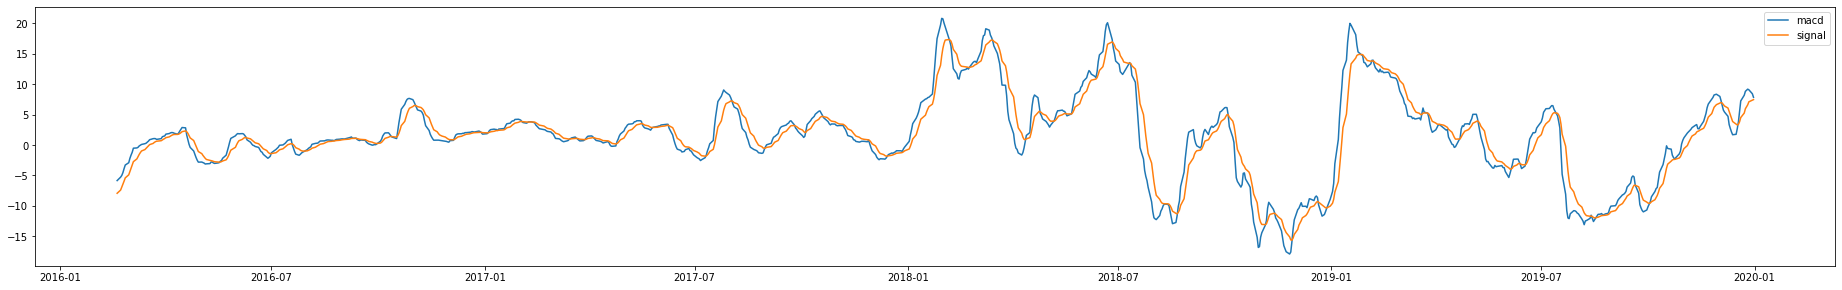

In [12]:
data = yfinance.download('NFLX','2016-1-1','2020-1-1')
data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
fig = plt.figure()
fig.set_size_inches((25, 18))
ax_macd = fig.add_axes((0, 0.24, 1, 0.2))
ax_macd.plot(data.index, data["macd"], label="macd")
ax_macd.plot(data.index, data["macd_signal"], label="signal")
ax_macd.legend()

[*********************100%***********************]  1 of 1 completed


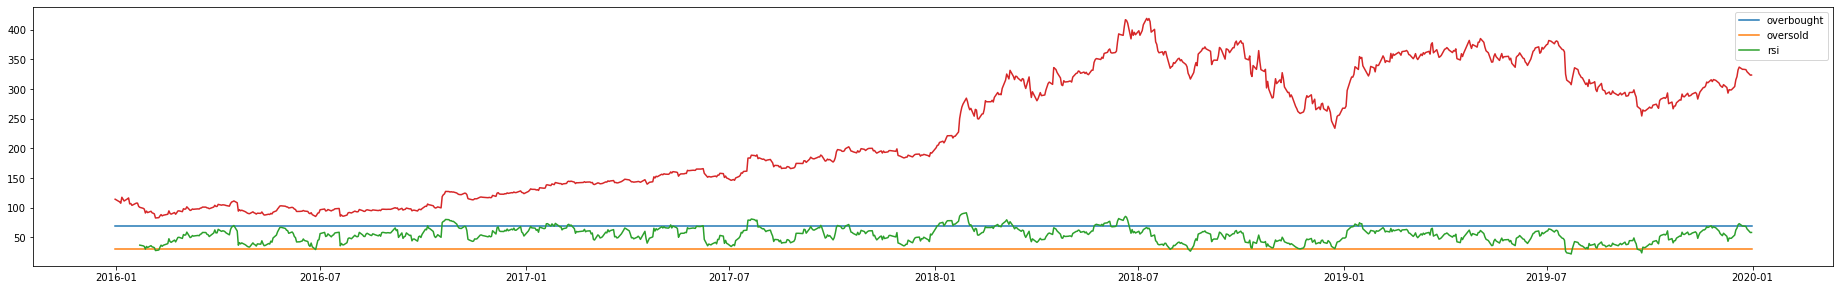

In [13]:
data = yfinance.download('NFLX','2016-1-1','2020-1-1')
rsi = talib.RSI(data["Close"])
fig = plt.figure()
fig.set_size_inches((25, 18))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
ax_rsi.plot(data.index, rsi, label="rsi")
ax_rsi.plot(data["Close"])
ax_rsi.legend()

<function matplotlib.pyplot.show(*args, **kw)>

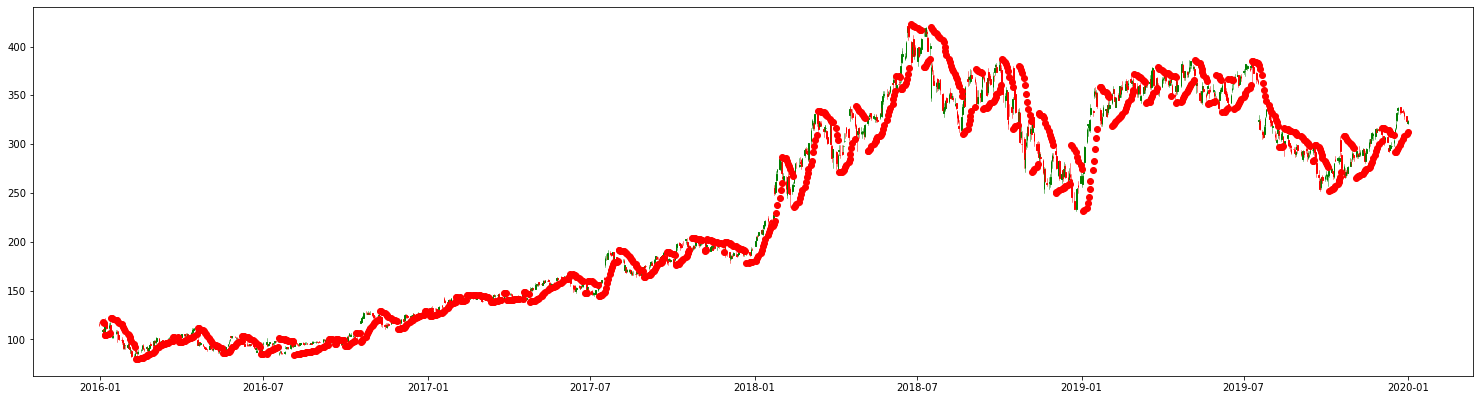

In [14]:
sar = talib.SAR(data['High'], data['Low'], 0.020)
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ohlc = []
for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])
candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
plt.plot(sar,'ro')
plt.show

In [15]:
df_appl = yfinance.download('AAPL','2020-1-1','2021-01-27')
close_appl = df_appl['Close']

[*********************100%***********************]  1 of 1 completed


In [16]:
df_msft = yfinance.download('MSFT','2020-1-1','2021-01-27')
close_msft = df_msft['Close']

[*********************100%***********************]  1 of 1 completed


In [17]:
df_tsla = yfinance.download('TSLA','2020-1-1','2021-01-27')
close_tsla = df_tsla['Close']

[*********************100%***********************]  1 of 1 completed


In [18]:
sma_1 = SMA(close_tsla,60)
sma_2 = SMA(close_tsla,4)

211 207


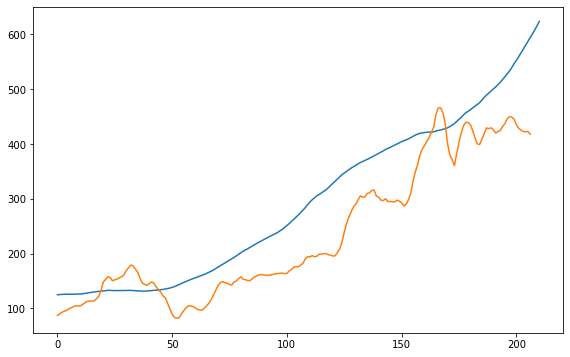

In [19]:
sma_1 = np.array(sma_1).reshape(len(sma_1),1)
sma_2 = np.array(sma_2).reshape(len(sma_2),1)
sma_2 = sma_2[:-60]
print(len(sma_1),len(sma_2))
plt.plot(sma_1)
plt.plot(sma_2)

In [18]:
smas = np.hstack((sma_1,sma_2))
smas.shape
X = np.array(smas)
y = np.array(close_price[:-59])
X.shape,y.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 211 and the array at index 1 has size 207

In [ ]:
model = Sequential()
model.add(Dense(100,input_shape = (None,2)))
model.add(Dense(128))
model.add(Dense(1))
print(model.summary())
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X,y,epochs = 100,validation_split = 0.33)

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2, strides=None)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2, strides=None)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2, strides=None)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(128,return_sequences = True))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
model = tensorflow.keras.Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(len(data[0]),)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
for i in range(10):
    model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
def estimate_profits(pred,y):
    profits = 0
    investment = 100
    log = []
    for i in range(len(y)-1):
        if pred[i][0] > y[i]:
            trade = 'buy'
        elif pred[i][0] < y[i]:
            trade = 'sell'
        else:
            trade = None
        if y[i+1] > y[i]:
            correct_trade = 'buy'
        elif y[i+1] < y[i]:
            correct_trade = 'sell'
        else:
            correct_trade = None
        if correct_trade:
            if trade == correct_trade:
                profits += 0.8*investment
                log.append(1)
            else:
                profits -= investment
                log.append(0)
    accuracy = round(log.count(1)/len(log)*100)
    return profits,accuracy
profit,acc = estimate_profits(X,y)
profit /= 100
acc,profit